# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# 최대 열 수 설정 df 출력시 특성이 짤리지 않음
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('train.csv',index_col=0)
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# 기본 EDA (단일 변수)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

# 간단한 통계치확인


In [ ]:

# 기술 통계 확인
numeric_stats = df.describe().transpose()

# 범주형 변수의 빈도 수 확인
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_stats = pd.DataFrame()

for col in categorical_columns:
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'count']
    value_counts['percentage'] = (value_counts['count'] / len(df)) * 100
    categorical_stats = pd.concat([categorical_stats, value_counts], axis=1)

# 결합된 결과를 한눈에 보기
combined_stats = pd.concat([numeric_stats, categorical_stats], axis=1)

# 결과 출력
combined_stats

,count,mean,std,min,25%,50%,75%,max,Gender,count,percentage,Customer Type,count,percentage,Type of Travel,count,percentage,Class,count,percentage,satisfaction,count,percentage
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Age

In [ ]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

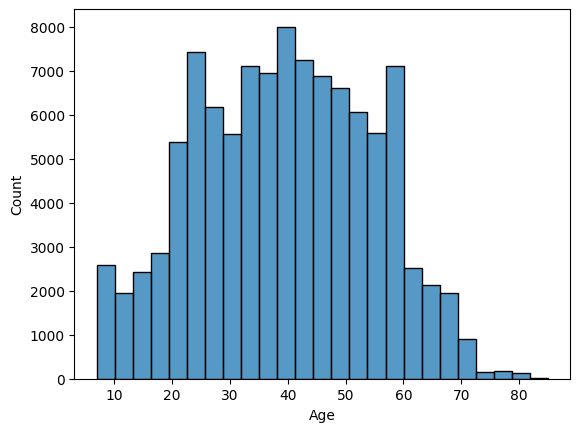

In [ ]:
sns.histplot(df['Age'], bins=25)

<Axes: xlabel='Age', ylabel='Density'>

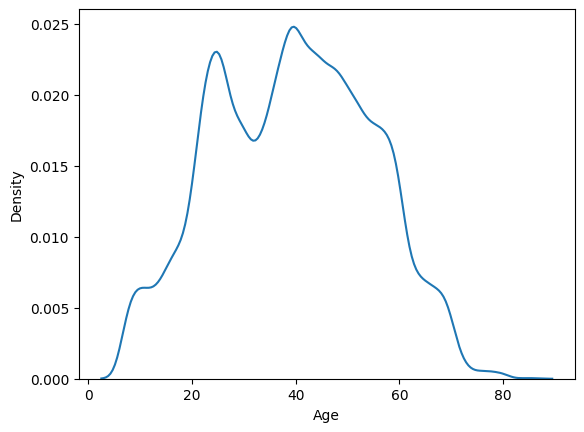

In [ ]:
sns.kdeplot(df['Age'])

<Axes: ylabel='Age'>

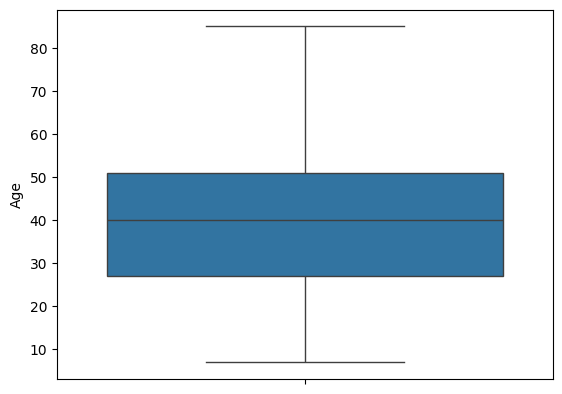

In [ ]:
sns.boxplot(df['Age'])

Age_Group
[0, 10)      1.824505
[10, 20)     7.628433
[20, 30)    20.146615
[30, 40)    19.900972
[40, 50)    22.826537
[50, 60)    18.402065
[60, 70)     8.039765
[70, 80)     1.231107
Name: count, dtype: float64


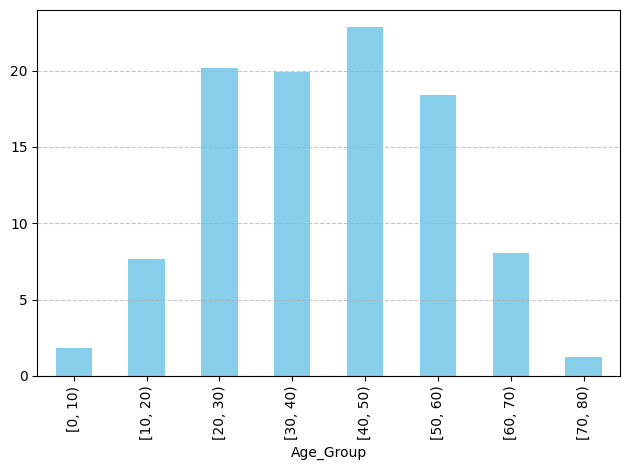

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(0, 90, 10), right=False)

# 나이대별로 그룹화하여 각 나이대별로 몇 명이 있는지 세기
age_group_counts = df['Age_Group'].value_counts().sort_index()

# 전체 인구 중 해당 나이대의 비율 계산
total_population = age_group_counts.sum()
age_group_percentage = (age_group_counts / total_population) * 100


print(age_group_percentage)

age_group_percentage.plot(kind='bar', color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Flight Distance

<Axes: xlabel='Flight Distance', ylabel='Count'>

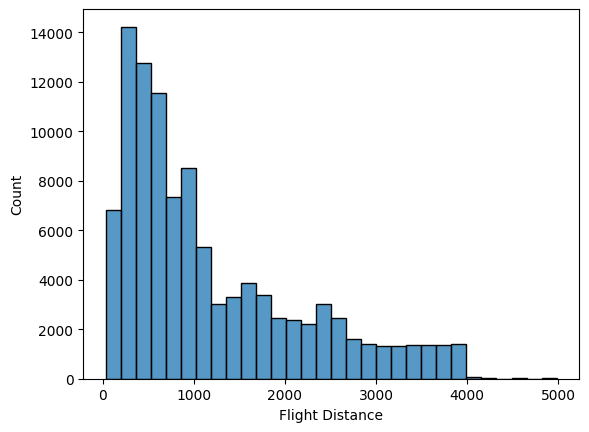

In [ ]:
sns.histplot(df['Flight Distance'], bins=30)

<Axes: ylabel='Flight Distance'>

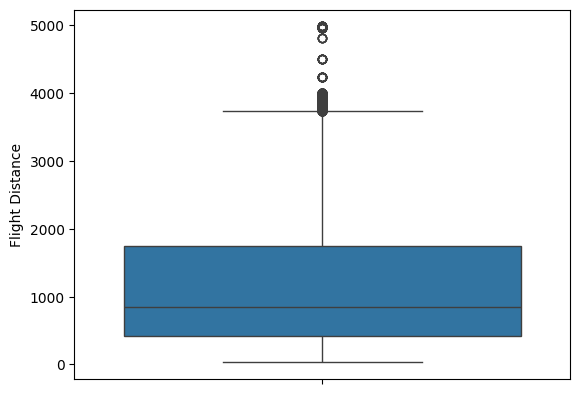

In [ ]:
sns.boxplot(df['Flight Distance'])

학습 결과 확인 후 이상치 제거 고려

더빈-왓슨 통계량: 모델의 변수 영향력 확인하는 통계치

활용해보는 것도 좋을 듯

##Departure Delay in Minutes

In [ ]:
df['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

<ipython-input-104-ae3550937197>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Departure Delay in Minutes'])


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

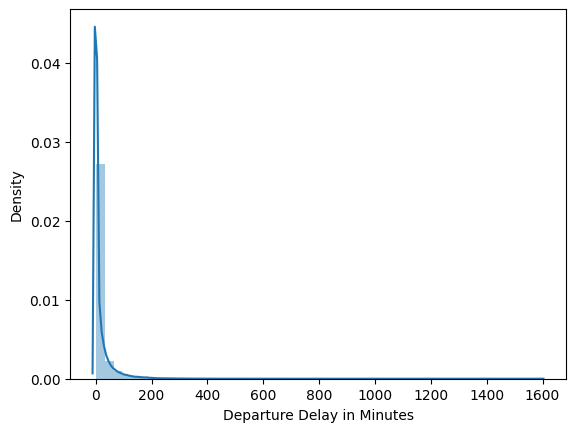

In [ ]:
sns.distplot(df['Departure Delay in Minutes'])

right-skewed 된 형태

<Axes: ylabel='Departure Delay in Minutes'>

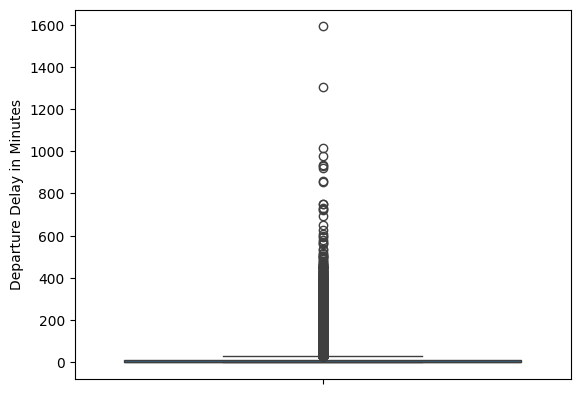

In [ ]:
departure_delay_boxplot = sns.boxplot(df['Departure Delay in Minutes'])
departure_delay_boxplot

## Arrival Delay in Minutes

In [ ]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

결측치 310개 존재

<ipython-input-107-2c023426c73f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Arrival Delay in Minutes'])


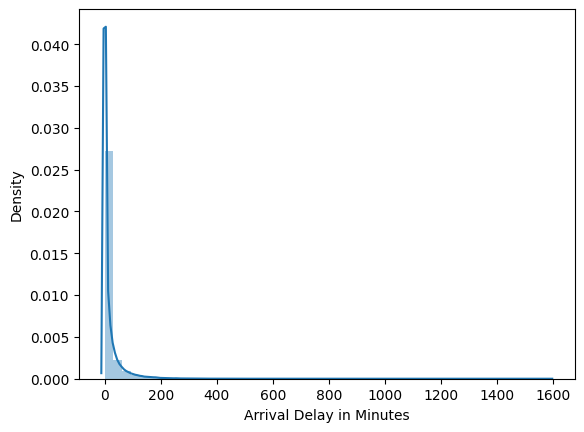

In [ ]:
sns.distplot(df['Arrival Delay in Minutes'])
#plt.ylim(0,4000)
plt.show()

<Axes: ylabel='Arrival Delay in Minutes'>

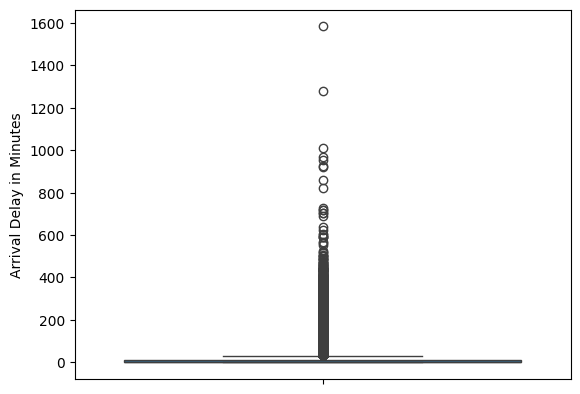

In [ ]:
arrival_delay_boxplot = sns.boxplot(df['Arrival Delay in Minutes'])
arrival_delay_boxplot

Departure Delay in Minutes와 유사한 형태이다.

## Gender

<Axes: xlabel='Gender', ylabel='count'>

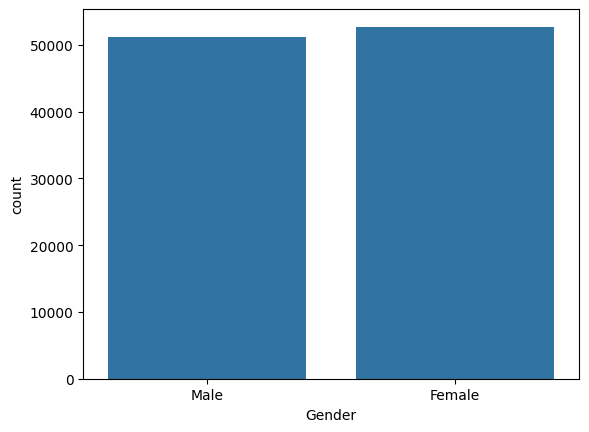

In [ ]:
sns.countplot(data=df,x='Gender')

## Class

In [ ]:
df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [ ]:
df['Class'] = df['Class'].map({'Business': 0, 'Eco': 1, 'Eco Plus':2})

In [ ]:
df = pd.read_csv('train.csv')

<Axes: xlabel='Class', ylabel='count'>

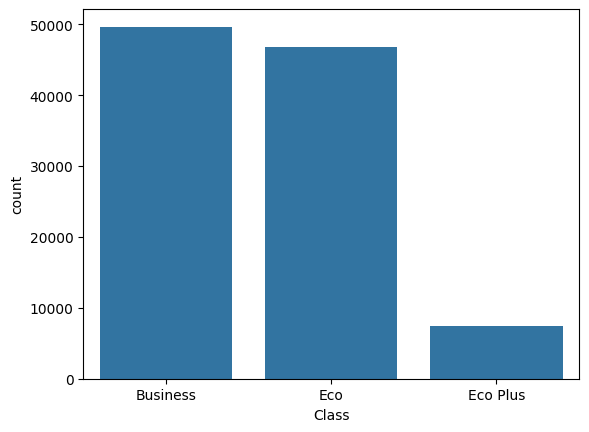

In [ ]:
sns.countplot(data=df,x='Class',order=df['Class'].value_counts().index)

## Customer Type

<Axes: xlabel='Customer Type', ylabel='count'>

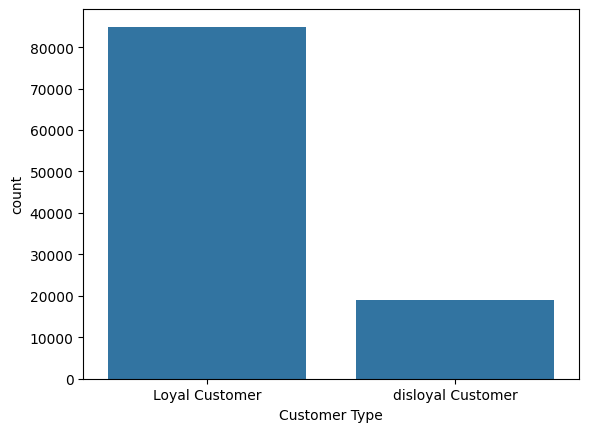

In [ ]:
sns.countplot(data=df,x='Customer Type')

##  Type of Travel

In [ ]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

<Axes: xlabel='Type of Travel', ylabel='count'>

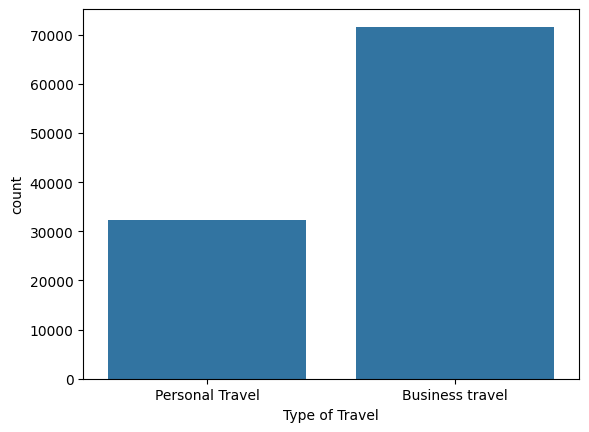

In [ ]:
sns.countplot(data=df, x='Type of Travel')

## satisfaction

In [ ]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

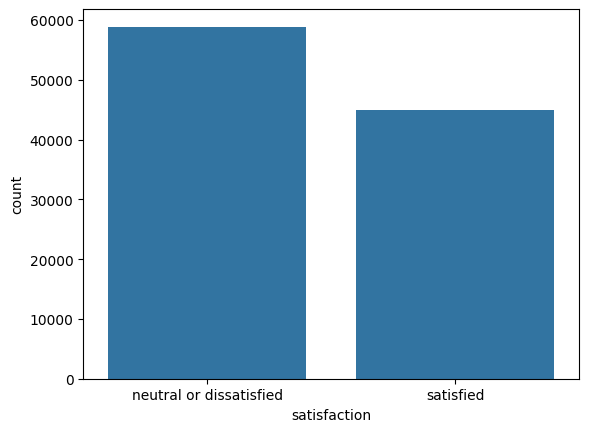

In [ ]:
sns.countplot(data=df, x='satisfaction')

#Type of Travel에 따른 만족도

label 0이 Business Travel, label 1이 Personal Travel이다

<Axes: xlabel='Type of Travel', ylabel='count'>

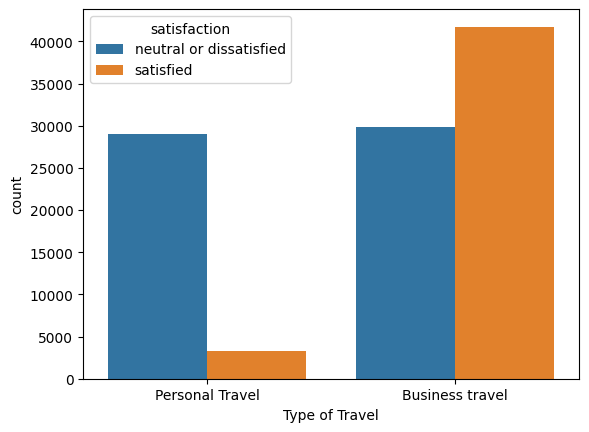

In [ ]:
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')

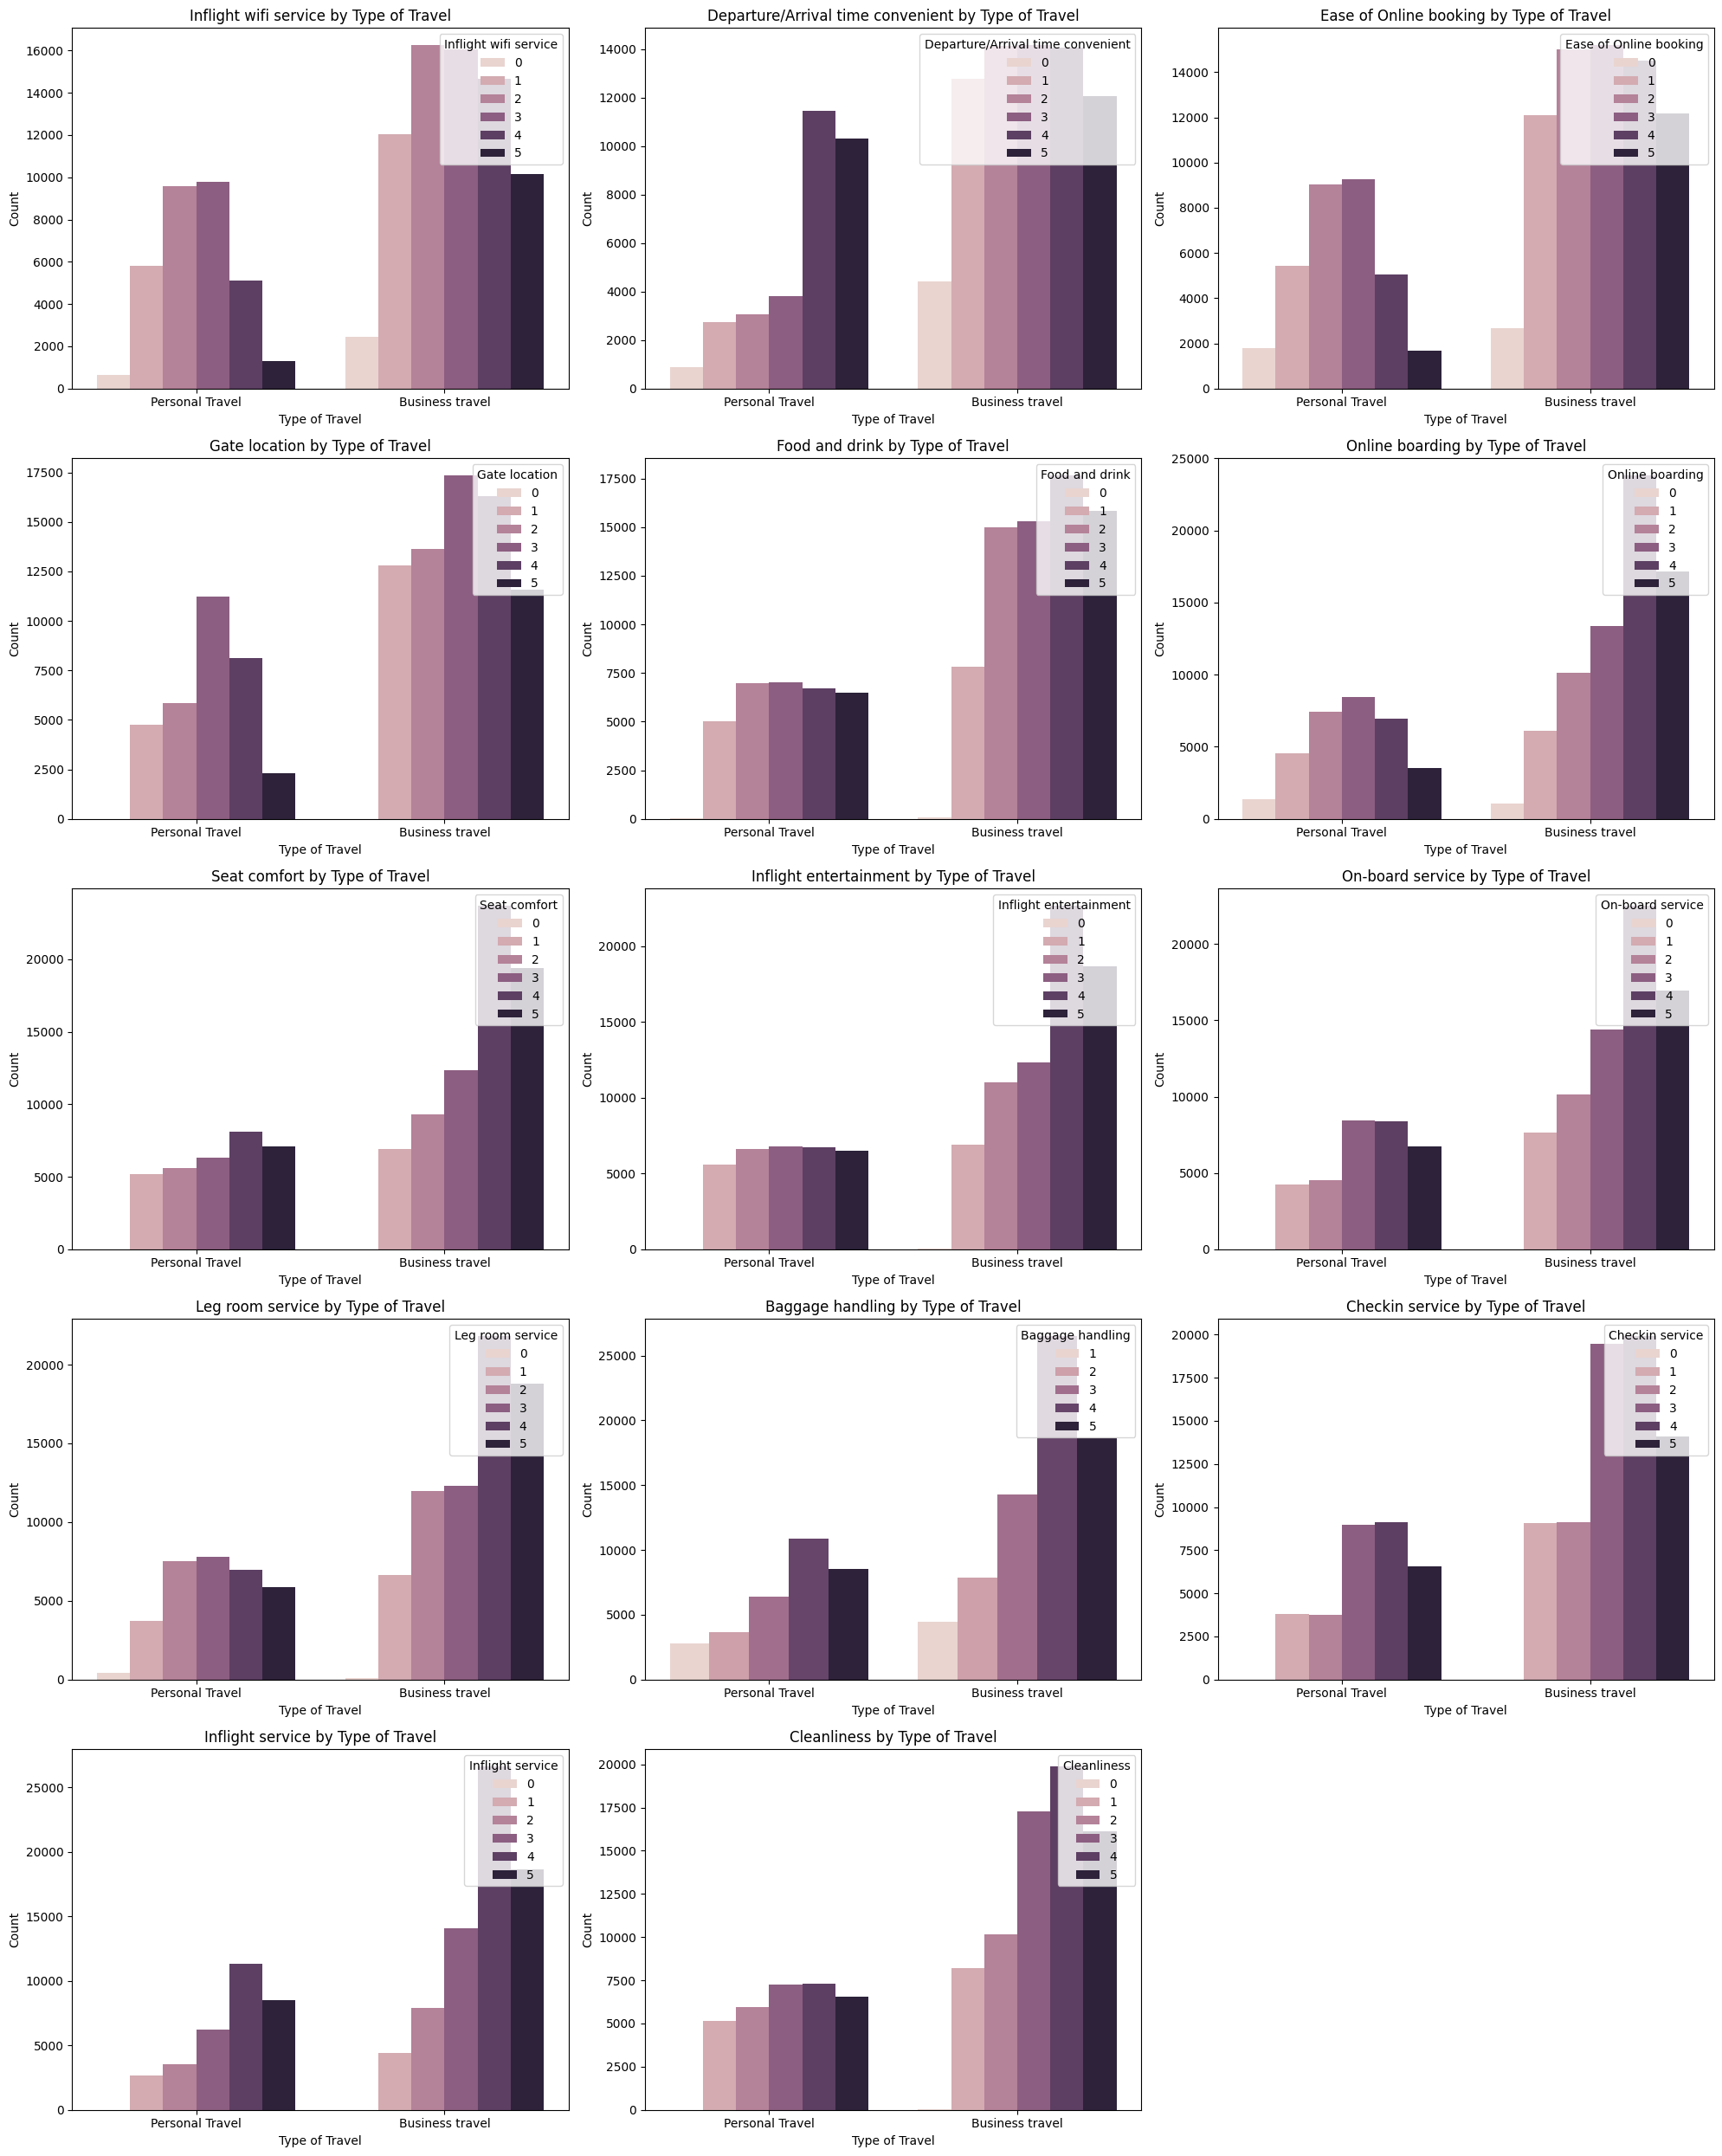

In [ ]:
features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
            'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
            'Inflight entertainment', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

plt.figure(figsize=(20, 25))
for i, feature in enumerate(features, start=1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x='Type of Travel', hue=feature)
    plt.title(f'{feature} by Type of Travel')
    plt.xlabel('Type of Travel')
    plt.ylabel('Count')
    plt.legend(title=feature, loc='upper right')

plt.tight_layout()
plt.show()

# Class에 따른 만족도

Business    49665

Eco         46745

Eco Plus     7494

Eco Plus의 데이터가 압도적으로 적다.

<Axes: xlabel='Class', ylabel='count'>

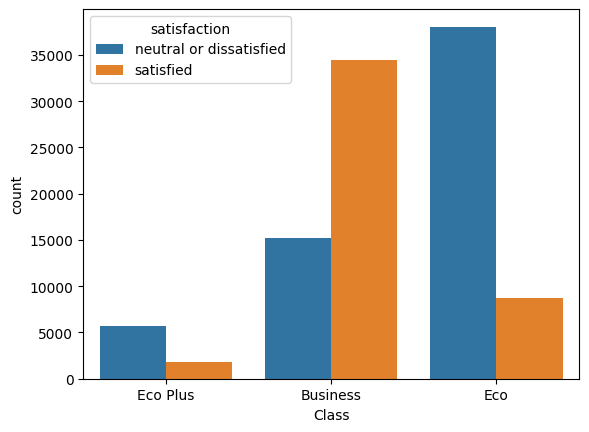

In [ ]:
sns.countplot(data=df, x='Class', hue='satisfaction')

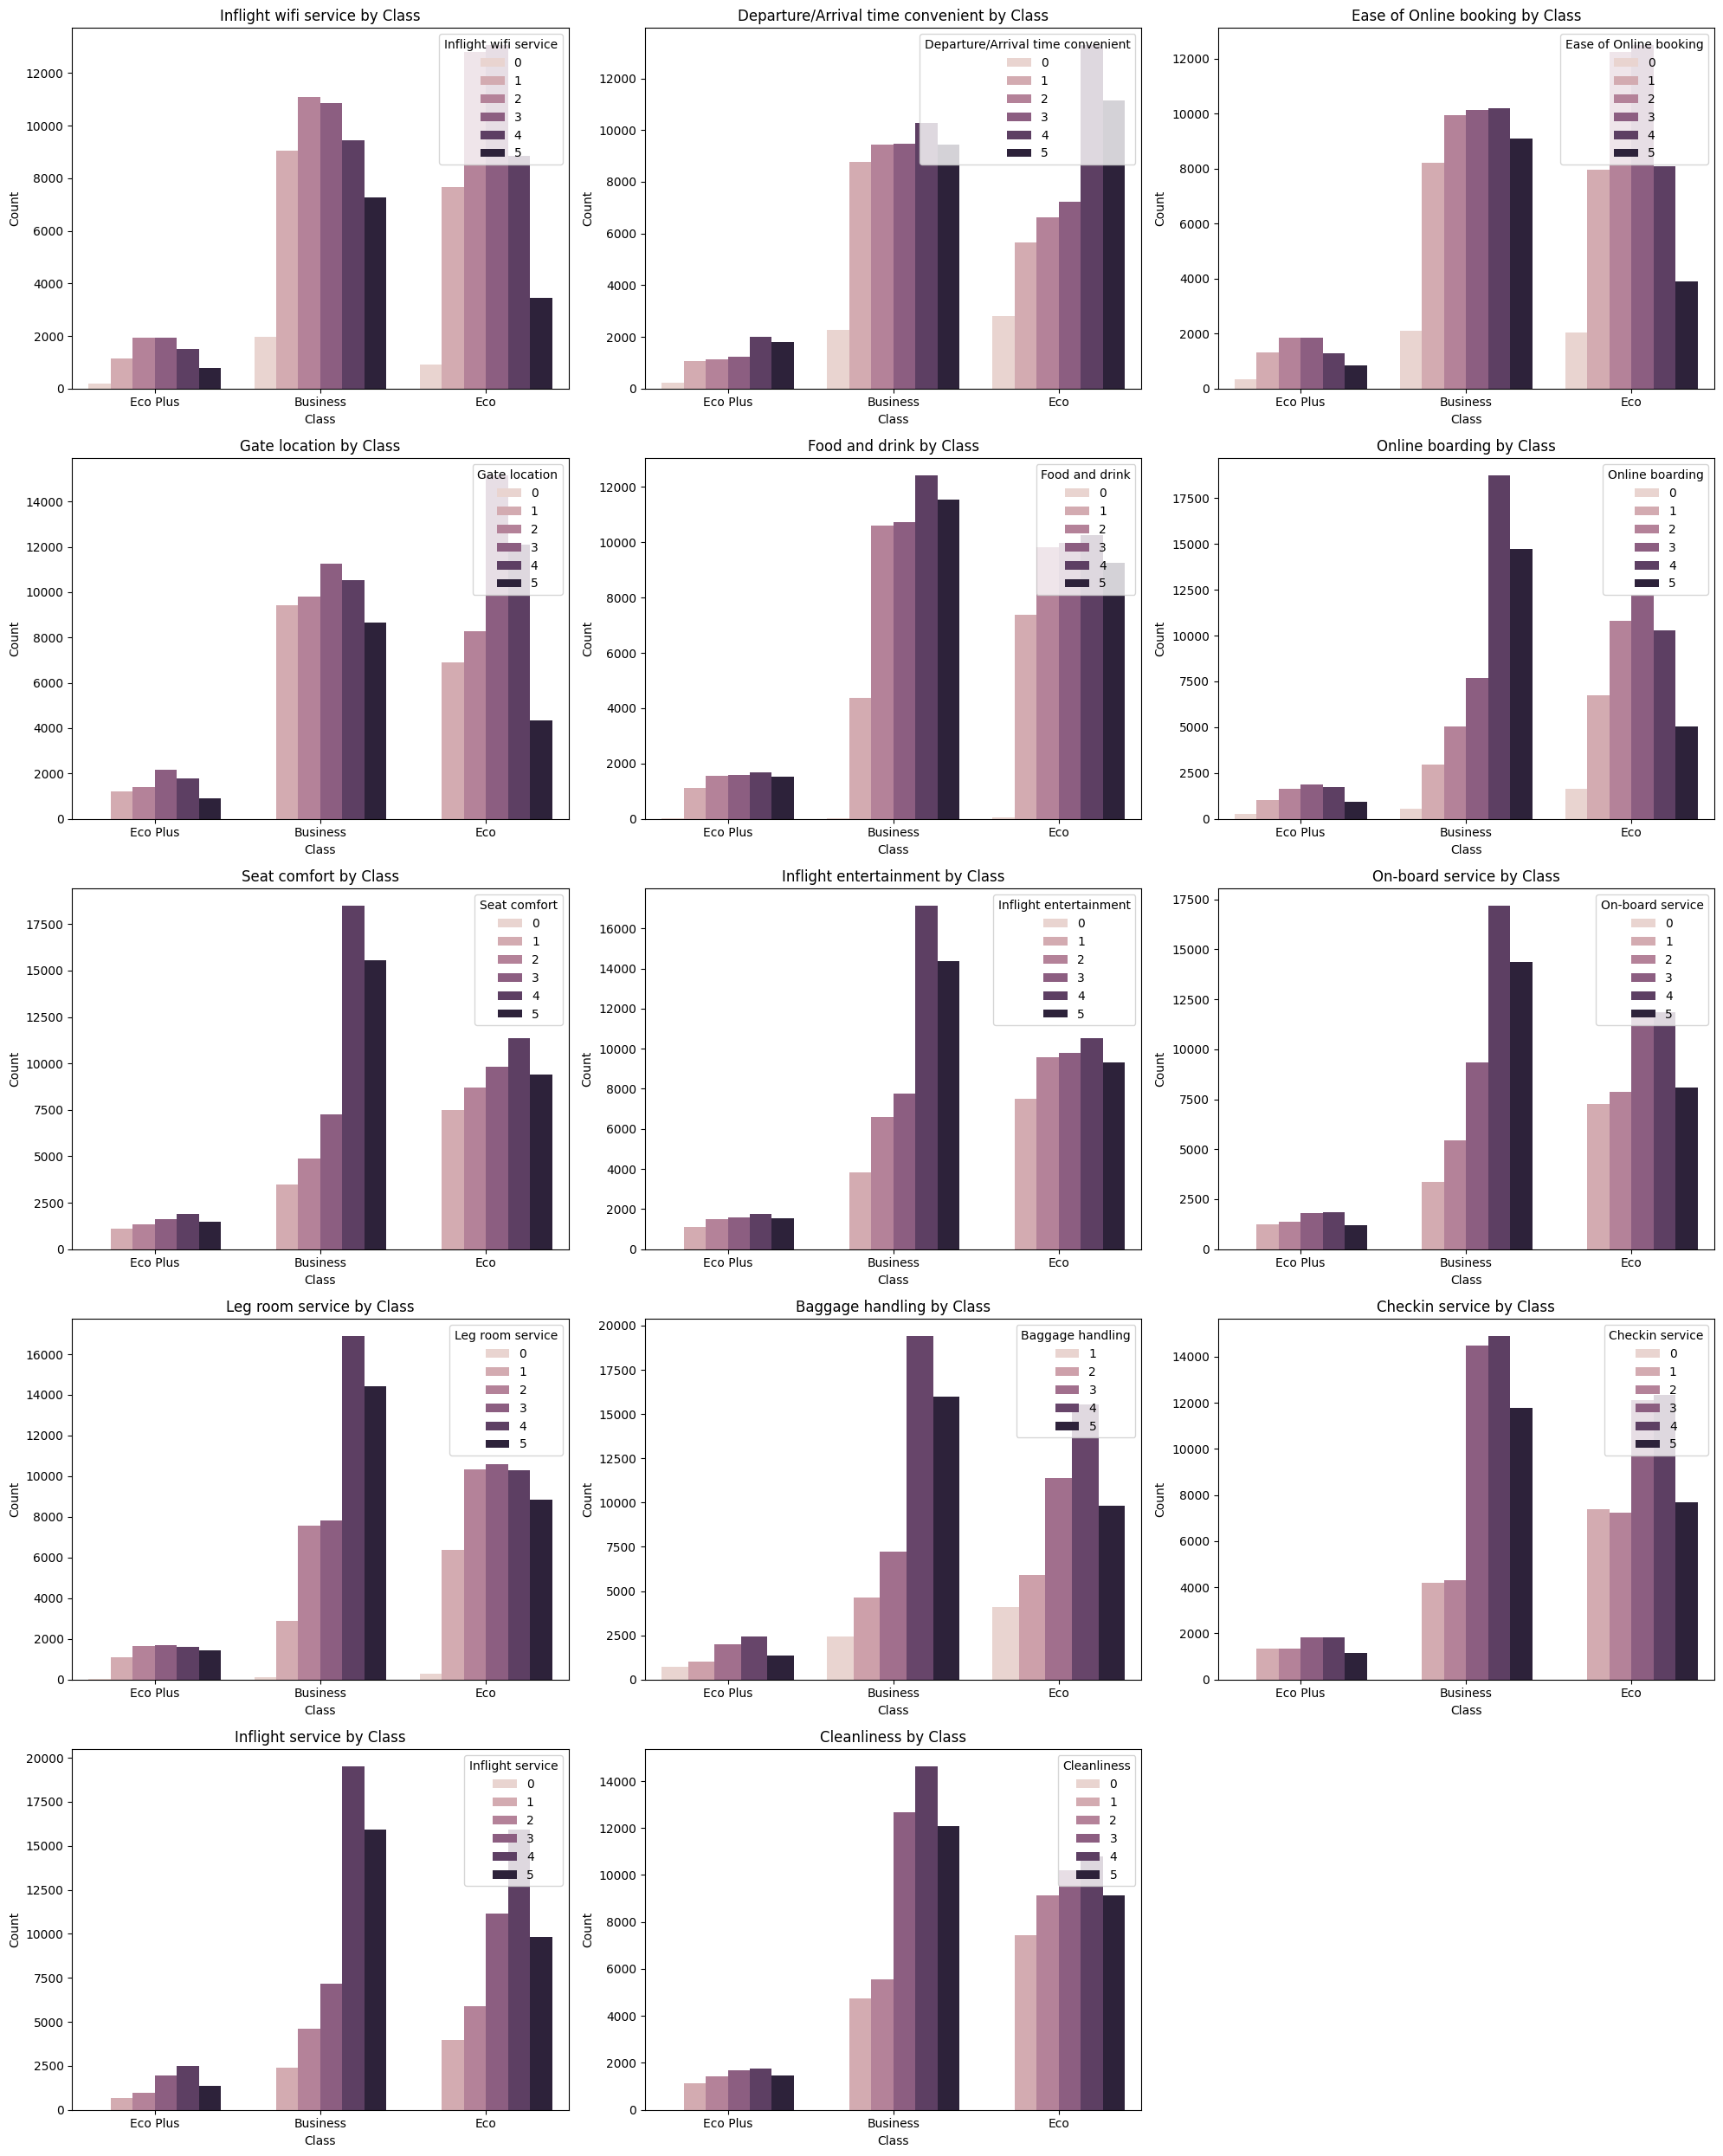

In [ ]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(features, start=1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x='Class', hue=feature)
    plt.title(f'{feature} by Class')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend(title=feature, loc='upper right')

plt.tight_layout()
plt.show()

# 변수들 간의 상관관계

<Axes: >

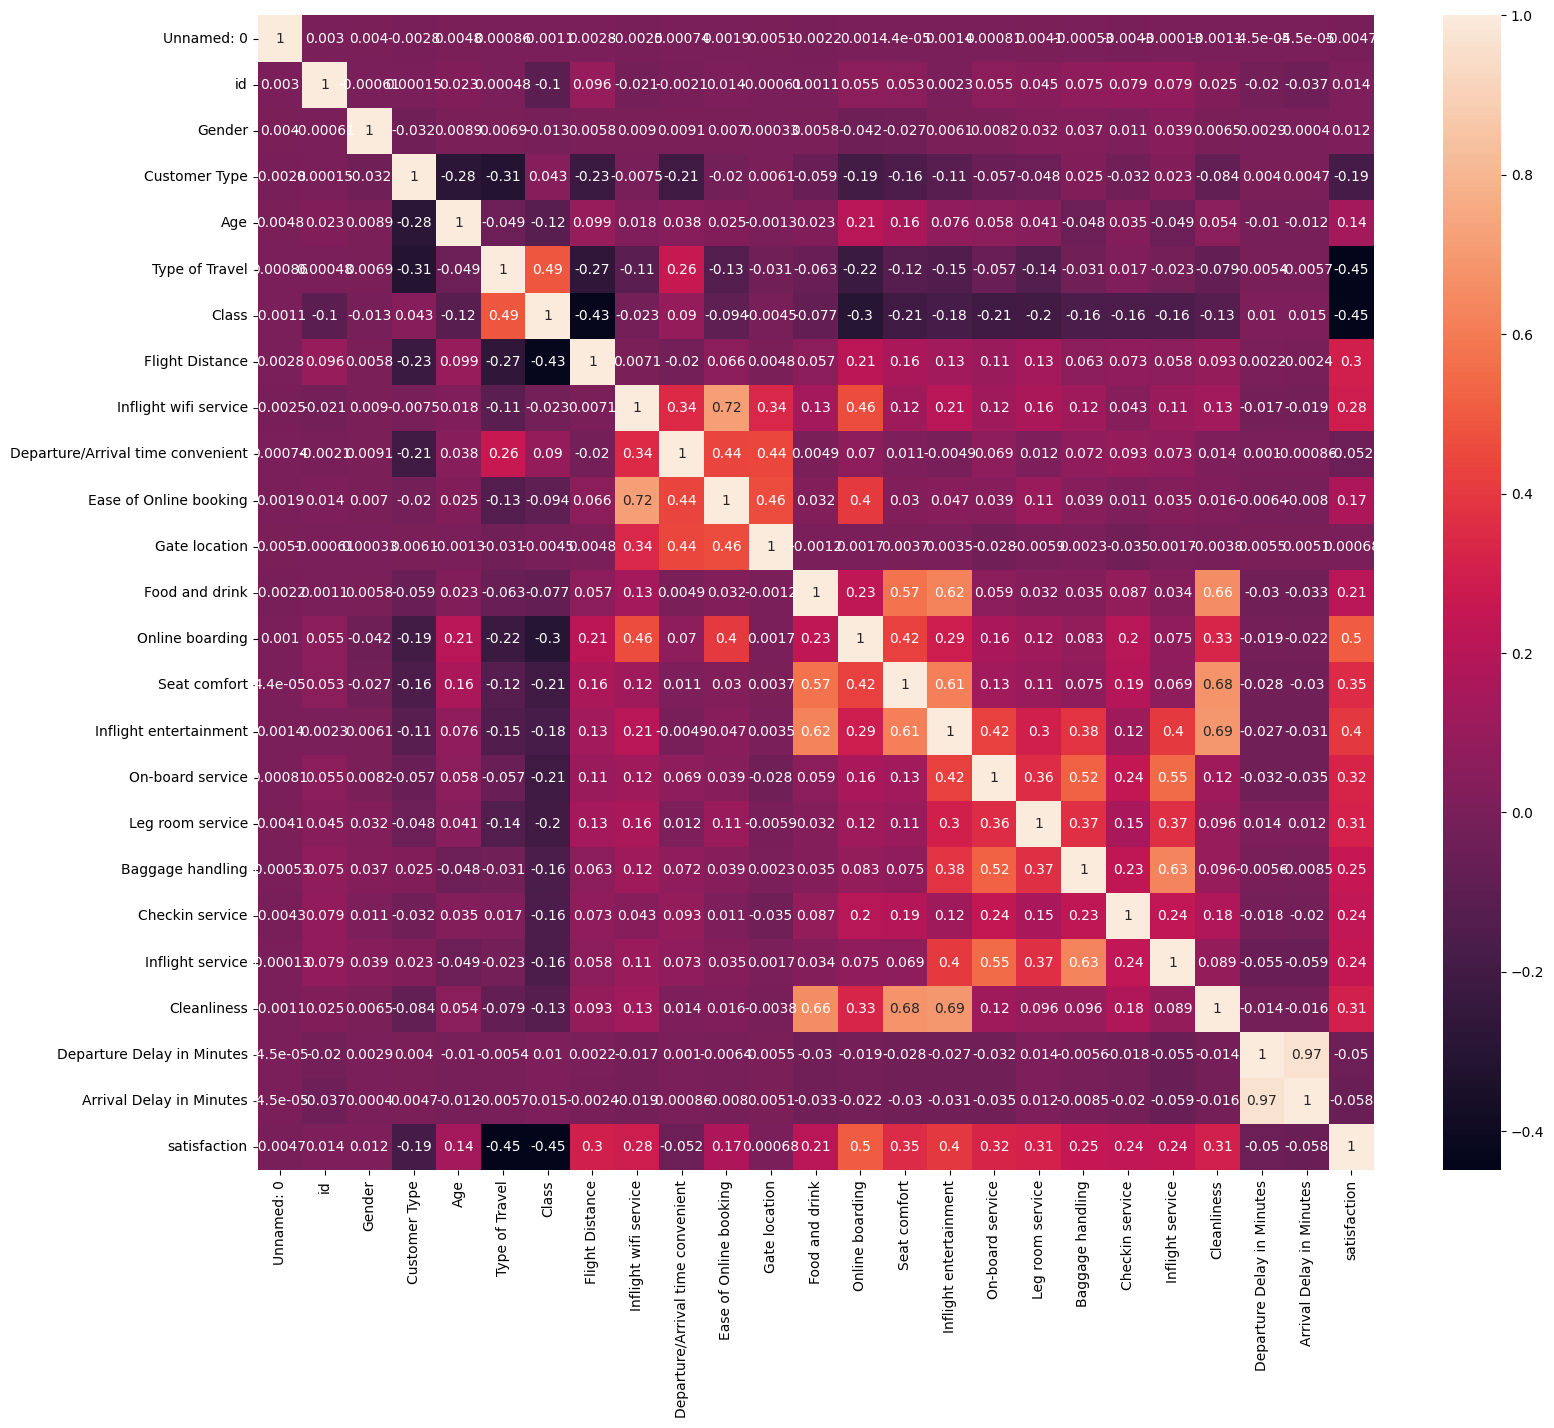

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)

# EDA결과를 바탕으로 데이터 전처리

In [ ]:
df = pd.read_csv('train.csv',index_col=0)

print(f'before preprocessing : {df.shape}')

# 불필요한 컬럼 제거
df.drop(columns=['id'], inplace=True)




# 정수형 변수 확인
integer_columns = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']


# 결측치 제거
df = df.dropna(axis = 0)
print(f'after remove nan datas : {df.shape}')



# 특정 행에 정수형 데이터 0이 포함되어있으면 해당 행 삭제
df = df[~df[integer_columns].apply(lambda row: (row == 0).any(), axis=1)]
print(f'after remove 0 data : {df.shape}')



# 모든 서비스에 대해 같은 점수를 매겼다면 해당 행 삭제
df = df[~df[integer_columns].apply(lambda row: row.nunique() == 1, axis=1)]
print(f'after remove unreliable data : {df.shape}')



# 범주형 데이터 인코딩 : 범주형같은 경우 one-hot encoding, label encoding으로 나뉜다
# 원핫인코딩은 unique 범주마다 column을 하나씩 부여, 라벨인코딩은 unique label마다 unique integer부여
# ex) 원핫 인코딩 : 사과 0, 바나나 0, 딸기 0, 수박 1     ||    라벨인코딩 : 과일 종류 : 3(=수박)
# 원핫인코딩을 하면 사용할 랜덤 포레스트에서 선택할 수 있는 갈림길이 많아지고,
# 원핫인코딩으로 인해 생기는 갈림길은 랜덤 포래스트 정확도에 악영향을 끼칠 것이라고 예상
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(le.classes_)


df

before preprocessing : (103904, 24)
after remove nan datas : (103594, 23)
after remove 0 data : (95415, 23)
after remove unreliable data : (95393, 23)
['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


<ipython-input-124-29a6081e6ff7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-124-29a6081e6ff7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-124-29a6081e6ff7>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


# 모델적용

In [ ]:
# satisfaction 값의 개수 출력
satisfaction_counts = df['satisfaction'].value_counts()
print("Satisfaction value counts:")
print(satisfaction_counts)

Satisfaction value counts:
satisfaction
0    54773
1    40620
Name: count, dtype: int64


Dataset size: (95393, 24)
Encoded satisfaction values:
{0: 0, 1: 1}
Training set size: (76314, 22)
Test set size: (19079, 22)
Accuracy: 0.9616856229362126
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10796
           1       0.97      0.94      0.96      8283

    accuracy                           0.96     19079
   macro avg       0.96      0.96      0.96     19079
weighted avg       0.96      0.96      0.96     19079

                              Feature  Importance
11                    Online boarding    0.181081
6               Inflight wifi service    0.112180
4                               Class    0.098797
3                      Type of Travel    0.094730
13             Inflight entertainment    0.077756
15                   Leg room service    0.045672
12                       Seat comfort    0.043759
1                       Customer Type    0.039572
5                     Flight Distance    0.03

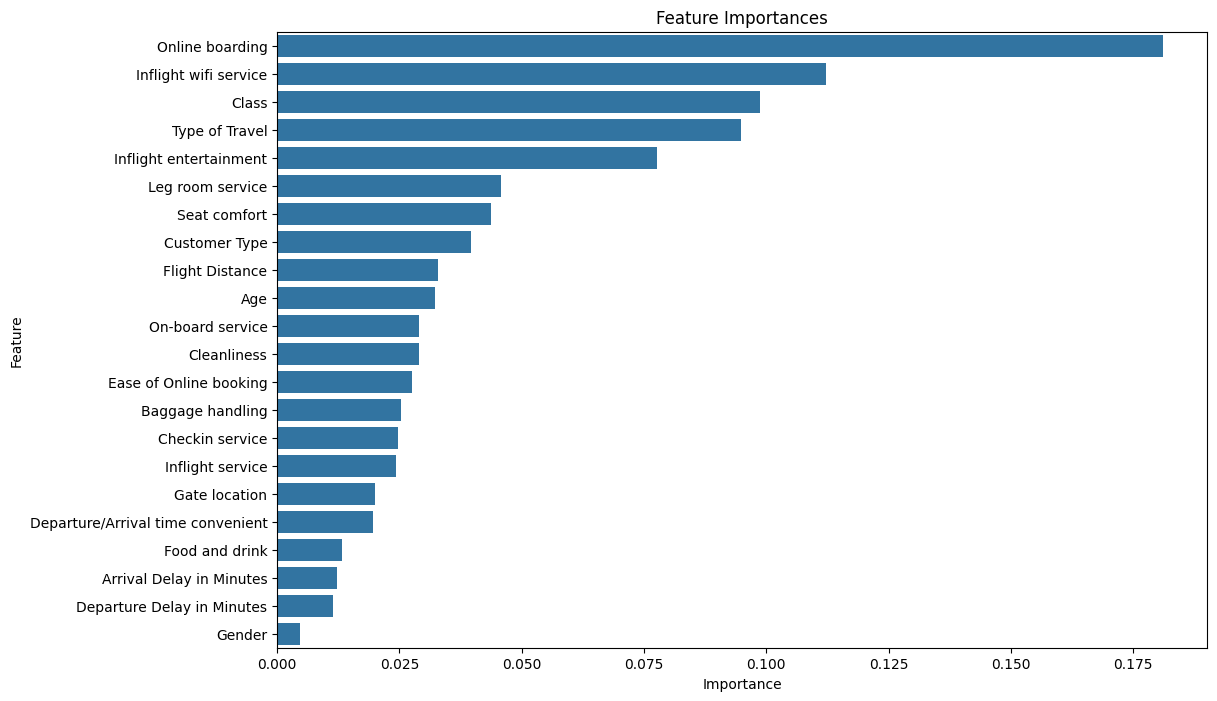

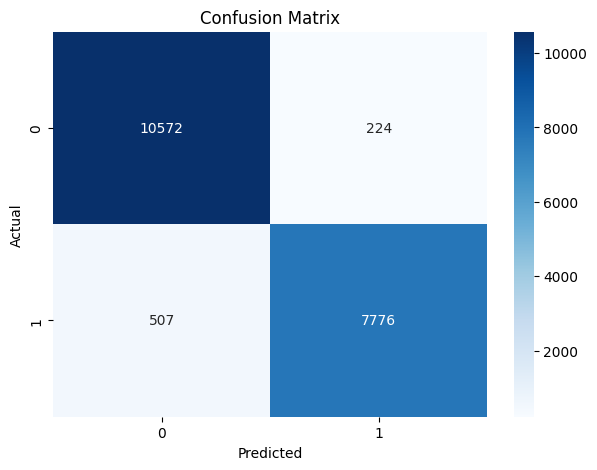

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 크기 확인
print(f"Dataset size: {df.shape}")

# satisfaction 컬럼 인코딩
label_encoder = LabelEncoder()
df.loc[:, 'satisfaction_encoded'] = label_encoder.fit_transform(df['satisfaction'])

# 인코딩된 값 확인
encoded_values = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Encoded satisfaction values:")
print(encoded_values)

# 특성과 레이블 분리
X = df.drop(columns=['satisfaction', 'satisfaction_encoded'])
y = df['satisfaction_encoded']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# 랜덤 포레스트 모델 초기화 및 훈련
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 정확도 점수 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 특성 중요도 계산
importances = rf.feature_importances_

# 특성 중요도를 데이터프레임으로 정리
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 특성 중요도 출력
print(feature_importances)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
